<a href="https://colab.research.google.com/github/HW0327/ECE-Machine-Learning/blob/main/Convert_Speech_to_Text_Using_Deep_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert Speech to Text Using Deep Speech

Haoyu Wang(hw3256)

## Background

Deep Speech is a system designed by Baidu's research team to efficiently convert speech to text. Compared with previous conversion systems, it imporves the accuracy and avoids the need for a large number of hard coding collected sound features by training recurrent neural network (RNN), making the system more simple. 

Like convolutional neural network, recurrent neural network is a type of nerual network.[2] It is usually used to process sequential data, since it memorizes the output of the units in previous time steps, and store them in the hidden layer, and use them to calculate the input in the current time step, as shown in the figure below. The final output can be calculated by the unit in the last time step. Compared with the truth value, we can get the loss function, and back propagate to the network to update weight and bias of each unit the minimum loss value is achieved.

<img src="https://miro.medium.com/max/1400/1*4KwIUHWL3sTyguTahIxmJw.png" width="500">

Image from [4]

The RNN in the deep speech system consists of five hidden layers, as shown below. The first three layers operate on independent data from voice spectrogram, and are nor recurrent. The fourth layer has two hidden units, one is forward recurrence, and one with backward recurrence.[1] After the fourth lay finish both forward and backword recurrence, the fifth layer input can be generated. Computing a standard softmax function, we can get the final output of the network at time t, which is the probabilities of each character in the alphabet. Then, computing the Connectionist Temporal Classification (CTC) Loss function to measure the model error, and back propagate to the model to minimize the error.

<img src="https://github.com/HW0327/ECE-Machine-Learning/blob/main/deep%20speech%20model.png?raw=true" width="500">

Image from [1]

CTC loss function used in the model is not usual for classical neural networks, but quite commonly used for problems involving sequencial data. It sums over the probability of all possible alignments of input data, and produce the loss value by comparing with the truth value.

For example, a RNN outputs the probabilities of a, b and - at time t0, t1 and t2 are shown below. The truth value is "a", and all posibble paths for "a" are "aaa", "a--", "-a-", "aa-", "-aa", "--a". So we can get the CTC by summing up the probability of each path, 0.048 + 0.168 + 0.018 + 0.072 + 0.012 + 0.028 = 0.346. Then we can calculate the loss value by taking negative log of 0.346, which is 0.461. [3]

<img src="https://sid2697.github.io/Blog_Sid/assets/images/CTC_3.png" width="500">

Image from [3]

To improve the model preformance in noisy environments, they overlaped the noise track and audio track. Since the noise can be memorized and subtracted thrugh the recurrent newwork process, they splitted the noise track into many short clips, and superimposed all of them onto the audio track. To ensure the Lombard effect is represented in their data, they asked the person recording the audio to wear headphones and play the noise, so that the recorder would actively rise the voice to overcome the noise. The Lombard effect is when a speaker deliberately changes the volume of his or her voice in a noisy environment to overcome the surrounding noise. [5]

## Replicating the existing work

The code below comes from the documentation of usage of deep speech model [6]. To get this run, I deleted the part of creating and activating virtual environment as the code will not be run locally in my pc. I also imported youtubevideo package from Python library to properly fit the youtube video with the deep speech model. After that, I installed sox, which is a required package for the model to convert audio to an appropriate format and extract useful voice features [7]. Then, I downloaded the pre-trained model and example audio files from deep speech github website [8]. The last line outputs the final transcription of the example. I saved it to a text file called "example.txt" for later use.


In [ ]:

from IPython.display import YouTubeVideo

!apt-get install -qq sox
# Install DeepSpeech
!pip3 install deepspeech youtube-dl

# Download pre-trained English model files
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer

# Download example audio files
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/audio-0.9.3.tar.gz
!tar xvf audio-0.9.3.tar.gz

# Transcribe an audio file
!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio audio/2830-3980-0043.wav >> example.txt

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

## Building on the existing work


Now let's listen what the speaker says in the audio, and also compare with the outputs of deep speech model to see if the model get the correct transcription.

In [ ]:
! pip3 install IPython
from IPython.display import Audio

f = open('example.txt', 'r')
file_contents = f.read()
print (file_contents)

Audio("audio/2830-3980-0043.wav")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
experience proves this



The model works well with the above example as the audio is short and clear. Now let's try longer one from youtube to see if the model works in a real situation. The video is about three minutes long, so it may take a while to download and transcribe. The code below was adpated from Speech Recognition with DeepSpeech google colab notebook. [10]

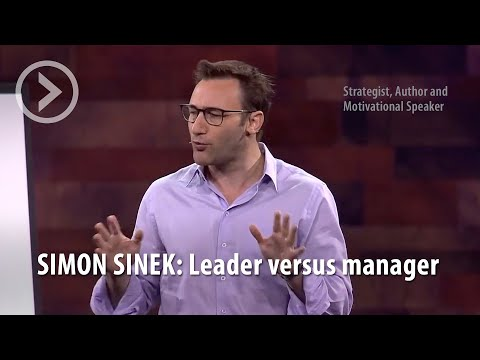

In [ ]:
YOUTUBE_ID = 'nSUJwmPQEyg'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio test.wav >> tedspeech.txt

f = open('tedspeech.txt', 'r')
file_contents = f.read()
print (file_contents)


[youtube] nSUJwmPQEyg: Downloading webpage
[download] Destination: test.m4a
[download] 100% of 3.38MiB in 00:47
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.9.3-models.pbmm
TensorFlow: v2.3.0-6-g23ad988
DeepSpeech: v0.9.3-0-gf2e9c85
2022-08-14 01:47:09.144933: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loaded model in 0.0108s.
Loading scorer from files deepspeech-0.9.3-models.scorer
Loaded scorer in 0.000212s.
Running inference.
Inference took 156.002s for 219.080s audio file.
there are two things that i think that great leaders need to have empathy and perspective and i think these things are very often f

By comparing what the speaker said in the video with the transcription produced by the model, we can see that the errors happened when the speaker says quickly, slurred or saying abbreviations. These problems are inevitable for any model, and in some cases, even native English speakers may not be able to hear them clearly.

To measure the accuracy of the model, the code below calculates the word error rate (WER) by comparing "the ground truth transcription" with the trasncription produced by the deep  speech model. Since there's no transcription text provided by the video uploader, the ground truth transcription used here is generated by youtube transcript api. [11, 12] As it is still constantly updating and improving the techniques it used, the output is almost consistent with the actual transcription in this video.
 

In [ ]:
!pip3 install youtube-transcript-api

from youtube_transcript_api import YouTubeTranscriptApi
  
def generate_transcript(id):
	transcript = YouTubeTranscriptApi.get_transcript(id)
	script = ""

	for text in transcript:
		t = text["text"]
		if t != '[Music]':
			script += t + " "
		
	return script, len(script.split())

id = 'nSUJwmPQEyg'
transcript, no_of_words = generate_transcript(id)

!pip install jiwer
from jiwer import wer

ground_truth = transcript
hypothesis = file_contents

error = wer(ground_truth, hypothesis)
print(error)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149877 sha256=243f13f90a9acbe778c2eb27ee011d58826635d7ab7f4f76387ccd0337ffb6c8
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
0.12081513828238719


The WER achieves 12%, which is pretty good score, but higher than the score showed in the paper [1], 6.56% in the clean environment. The reason, as I mentioned before, is that the speaker occasionally speaks slurred and uses abbreviations, such as CEO (Chief Executive Officer).

Next, to test the transcrption accuracy in noisy environment, I found a piece of advertisement on youtube, and calculate WER.

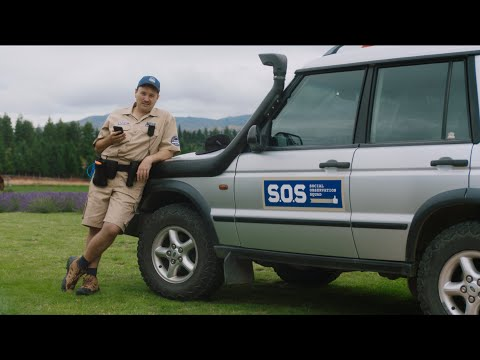

In [ ]:
YOUTUBE_ID = 'Trs-isdu4eE'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio test.wav >> travelling.txt

[youtube] Trs-isdu4eE: Downloading webpage
[download] Destination: test.m4a
[download] 100% of 2.34MiB in 00:50
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.9.3-models.pbmm
TensorFlow: v2.3.0-6-g23ad988
DeepSpeech: v0.9.3-0-gf2e9c85
2022-08-14 01:53:21.825841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loaded model in 0.0145s.
Loading scorer from files deepspeech-0.9.3-models.scorer
Loaded scorer in 0.000376s.
Running inference.
Inference took 102.920s for 151.417s audio file.


In [ ]:
f = open('travelling.txt', 'r')
file_contents = f.read()
print (file_contents)

even olinto situation the inevitable heartening to follow association and interaction of man you know them that tub the shop man sits quietly on the rock contemplate what douglas in the classic one in these parts the summit spread okayondonghsera osachile his landing a senlabor yet we all have but this summer we capitation traveling under the social intercourse he had to face trustfully lover a eyetalians der the warning go and enjoy the wine aragonese bikes and don't forget to see something or academical winterbottom there obliteration of a discontented troopers fortunately meditation all over gotteswerder switch it off well i just heard a confirmation that the levendale just see one of the most repeated scenes in all of social mediaevally me for dora combination the surely heard sometimes you know because there are some great other photos to take the sergius grandsons to know what you need to do it you need to get so the squire and trying aesayatyenenghdon pastepot but that rooidam



In [ ]:
id = 'Trs-isdu4eE'
transcript, no_of_words = generate_transcript(id)
print (transcript)
ground_truth = transcript
hypothesis = file_contents

error = wer(ground_truth, hypothesis)
print(error)

oh i've been alluded to a situation it's been happening a lot lately people have been seeing those photos of social media and are going to great lengths to copy them i mean you know them hot tub back shot man sits quietly on the rock contemplating hot dog legs and the classic one in these parts the summit spread eagle okay easy does it slip lower those arms nice and slow that's it mate oscar charlie the eagle has landed hi guys i've seen all this before yeah we all have but this summer we're clamping down on anyone traveling under the social influence okay come on guys you've had your fun trust me you're gonna absolutely love it okay how about you two you can consider this a warning guys um enjoy the wineries on those bikes and don't forget to share something new okay we have a suspect travelling under the social influence at the lavender field copy that looks like lavender it's the fourth one we've had this week oh lavender we've missed them fedora switch it off well i just had a conf

Even though the Deep Speech model added noise tracks in the data collection process to try to avoid high WER in a noisy environment, 69% of WER indicated that there are still some shortcomings in the model. For example, the accuracy of the model was greatly reduced when translating words with accents, and also the words from intercom in the video.

So let's try another speech to text convertion model, QuartzNet, and see if this one does better job than deep speech. The code below comes from Speech Recognition with QuartzNet google colab notebook [14].

In [ ]:
#@title
import os
from os.path import exists, join, basename, splitext
from IPython.display import YouTubeVideo

!pip -q install wget youtube-dl wget tensorboardX kaldi-io marshmallow num2words ruamel.yaml soundfile sox torch-stft unidecode
!pip install -q nemo-toolkit==0.9.0 nemo-asr==0.9.0 #--no-deps

# we need also Apex
if not exists('apex'):
  !git clone -q --depth 1 https://github.com/NVIDIA/apex
  !cd apex && pip install -q --no-cache-dir ./

     |████████████████████████████████| 125 kB 12.9 MB/s 
     |████████████████████████████████| 116 kB 39.9 MB/s 
     |████████████████████████████████| 109 kB 45.6 MB/s 
     |████████████████████████████████| 235 kB 70.9 MB/s 
     |████████████████████████████████| 546 kB 51.8 MB/s 
     |████████████████████████████████| 77 kB 4.6 MB/s 
     |████████████████████████████████| 45 kB 2.1 MB/s 
     |████████████████████████████████| 13.1 MB 42.0 MB/s 
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [ ]:
#@title
if not exists('quartznet15x5_multidataset'):
  # download the pretrained weights
  !wget -nc -q --show-progress -O quartznet15x5.zip https://api.ngc.nvidia.com/v2/models/nvidia/multidataset_quartznet15x5/versions/1/zip
  !unzip quartznet15x5.zip && mkdir quartznet15x5_multidataset && mv Jasper* quartznet15x5.yaml quartznet15x5_multidataset

quartznet15x5.zip   100%[===================>]  67.86M  17.7MB/s    in 5.0s    
Archive:  quartznet15x5.zip
  inflating: JasperDecoderForCTC-STEP-243800.pt  
  inflating: JasperEncoder-STEP-243800.pt  
  inflating: quartznet15x5.yaml      


In [ ]:
#@title
#
# this code is copied and modified from the NVIDIA/NeMo repo.
#

import json
from ruamel.yaml import YAML
import nemo
import nemo_asr

WORK_DIR = "/content/quartznet15x5_multidataset"
MODEL_YAML = "/content/quartznet15x5_multidataset/quartznet15x5.yaml"
CHECKPOINT_ENCODER = "/content/quartznet15x5_multidataset/JasperEncoder-STEP-243800.pt"
CHECKPOINT_DECODER = "/content/quartznet15x5_multidataset/JasperDecoderForCTC-STEP-243800.pt"
# Set this to True to enable beam search decoder
ENABLE_NGRAM = False
# This is only necessary if ENABLE_NGRAM = True. Otherwise, set to empty string
LM_PATH = "<PATH_TO_KENLM_BINARY>"

# Read model YAML
yaml = YAML(typ="safe")
with open(MODEL_YAML) as f:
    jasper_model_definition = yaml.load(f)
labels = jasper_model_definition['labels']

# Instantiate necessary Neural Modules
# Note that data layer is missing from here
neural_factory = nemo.core.NeuralModuleFactory(
    placement=nemo.core.DeviceType.CPU,
    backend=nemo.core.Backend.PyTorch)
data_preprocessor = nemo_asr.AudioToMelSpectrogramPreprocessor(factory=neural_factory)
jasper_encoder = nemo_asr.JasperEncoder(
    jasper=jasper_model_definition['JasperEncoder']['jasper'],
    activation=jasper_model_definition['JasperEncoder']['activation'],
    feat_in=jasper_model_definition['AudioToMelSpectrogramPreprocessor']['features'])
jasper_encoder.restore_from(CHECKPOINT_ENCODER, local_rank=0)
jasper_decoder = nemo_asr.JasperDecoderForCTC(
    feat_in=1024,
    num_classes=len(labels))
jasper_decoder.restore_from(CHECKPOINT_DECODER, local_rank=0)
greedy_decoder = nemo_asr.GreedyCTCDecoder()

def wav_to_text(manifest, greedy=True):
    from ruamel.yaml import YAML
    yaml = YAML(typ="safe")
    with open(MODEL_YAML) as f:
        jasper_model_definition = yaml.load(f)
    labels = jasper_model_definition['labels']

    # Instantiate necessary neural modules
    data_layer = nemo_asr.AudioToTextDataLayer(
        shuffle=False,
        manifest_filepath=manifest,
        labels=labels, batch_size=1)

    # Define inference DAG
    audio_signal, audio_signal_len, _, _ = data_layer()
    processed_signal, processed_signal_len = data_preprocessor(
        input_signal=audio_signal,
        length=audio_signal_len)
    encoded, encoded_len = jasper_encoder(audio_signal=processed_signal,
                                          length=processed_signal_len)
    log_probs = jasper_decoder(encoder_output=encoded)
    predictions = greedy_decoder(log_probs=log_probs)

    if ENABLE_NGRAM:
        print('Running with beam search')
        beam_predictions = beam_search_with_lm(
            log_probs=log_probs, log_probs_length=encoded_len)
        eval_tensors = [beam_predictions]

    if greedy:
        eval_tensors = [predictions]

    tensors = neural_factory.infer(tensors=eval_tensors)
    if greedy:
        from nemo_asr.helpers import post_process_predictions
        prediction = post_process_predictions(tensors[0], labels)
    else:
        prediction = tensors[0][0][0][0][1]
    return prediction

def create_manifest(file_path):
    # create manifest
    manifest = dict()
    manifest['audio_filepath'] = file_path
    manifest['duration'] = 18000
    manifest['text'] = 'todo'
    with open(file_path+".json", 'w') as fout:
        fout.write(json.dumps(manifest))
    return file_path+".json"

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################

INFO:root:PADDING: 16
2022-08-14 01:50:48,142 - INFO - PADDING: 16


STFT using torch


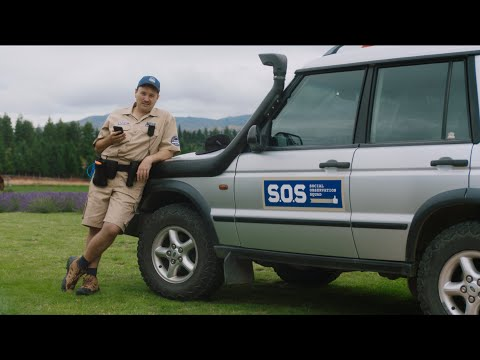

In [ ]:
YOUTUBE_ID = 'Trs-isdu4eE'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
#@title
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --quiet --output "downloaded.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!ffmpeg -loglevel panic -y -i downloaded.wav -acodec pcm_s16le -ac 1 -ar 16000 test.wav

travelling = wav_to_text(create_manifest('test.wav'))

print('\n\n')
print(travelling)

INFO:root:Dataset loaded with 5.00 hours. Filtered 0.00 hours.
2022-08-14 01:51:25,443 - INFO - Dataset loaded with 5.00 hours. Filtered 0.00 hours.
INFO:root:Evaluating batch 0 out of 1
2022-08-14 01:51:25,486 - INFO - Evaluating batch 0 out of 1
/usr/local/lib/python3.7/dist-packages/torch/functional.py:607: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:800.)
  normalized, onesided, return_complex)





["e've been a little to situationit'sep have been seeing thost photos of social media and i going to greatly to stacovinamnyou know them hot tub backshot man sits quietly on the rock contemplating hot dog liks in the clisic one in these parts the summit sprety hy gus i've seen all this before yeh we all have but this summer we're clamping down on anyone traveling under the sushankilmo gos you hate your fater just ma o you too ye can consider this a warning guyy am enjoy the winereats on those bikes and don't forget to share somethinkeri foeseridorswitcitof li just haid a confirmation that the lavender loutrers just shared one of the most replicated scenes in all of social medium they um follow me for dora combinnecause there are so many great other photos to take teside o usual graim shoks what you need to do is you need to think outsomete squv or tryingc"]


In [ ]:
ground_truth = transcript
hypothesis = travelling

error = wer(ground_truth, hypothesis)
print(error)

0.5962962962962963


The WER is 60% for QuartzNet model, which is lower than deep speech. The running time also shorter than deep learning as less parameters involved in the model and requires less computing power. [13]

## References

[1]Hannun, A., Case, C., Casper, J., Catanzaro, B., Diamos, G., Elsen, E., Prenger, R., Satheesh, S., Sengupta, S., Coates, A., & Ng, A. Y. (2014). Deep Speech: Scaling up end-to-end speech recognition. ArXiv:1412.5567 [Cs]. https://arxiv.org/abs/1412.5567

[2] Introduction to recurrent neural network. GeeksforGeeks. (2022, June 28). Retrieved August 12, 2022, from https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/ 

[3] Book, S. S. (2019, October 19). Explanation of Connectionist Temporal Classification. Siddhant’s Scratch Book. https://sid2697.github.io/Blog_Sid/algorithm/2019/10/19/CTC-Loss.html

[4] Kostadinov, S. (2019, November 10). How Recurrent Neural Networks work - Towards Data Science. Medium. https://towardsdatascience.com/learn-how-recurrent-neural-networks-work-84e975feaaf7

[5] The Lombard Effect as a Communicative Phenomenon. (2008). Priscilla Lau. https://linguistics.berkeley.edu/phonlab/documents/2008/lau.pdf

[6] Welcome to DeepSpeech’s documentation! — DeepSpeech 0.9.3 documentation. (n.d.). Deep Speech. Retrieved August 13, 2022, from https://deepspeech.readthedocs.io/en/v0.9.3/

[7] SoX - Sound eXchange | HomePage. (n.d.). SoX. Retrieved August 13, 2022, from http://sox.sourceforge.net/

[8] M. (2020, December 10). GitHub - mozilla/DeepSpeech: DeepSpeech is an open source embedded (offline, on-device) speech-to-text engine which can run in real time on devices ranging from a Raspberry Pi 4 to high power GPU servers. GitHub. Retrieved August 13, 2022, from https://github.com/mozilla/DeepSpeech

[9] Rockikz, A. (2019, October 15). How to Convert Speech to Text in Python - PythonCode. Retrieved August 13, 2022, from https://www.thepythoncode.com/article/using-speech-recognition-to-convert-speech-to-text-python

[10] Speech Recognition with DeepSpeech. (n.d.). Googe Colab. Retrieved August 13, 2022, from https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/MozillaDeepSpeech.ipynb

[11] youtube-transcript-api. (2022, March 30). PyPI. Retrieved August 13, 2022, from https://pypi.org/project/youtube-transcript-api/

[12] Jain, H. (2022, August 13). How to get subtitles for YouTube videos using Python. Educative: Interactive Courses for Software Developers. Retrieved August 13, 2022, from https://www.educative.io/answers/how-to-get-subtitles-for-youtube-videos-using-python

[13] Kriman, S. (2019, October 22). QuartzNet: Deep Automatic Speech Recognition with 1D Time-Channel. . . arXiv.Org. Retrieved August 13, 2022, from https://arxiv.org/abs/1910.10261

[14] Speech Recognition with QuartzNet. (n.d.). Google Colab. Retrieved August 13, 2022, from https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/NVidiaQuartzNet.ipynb